In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


# imdb 評論2分類


In [2]:
(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#num_words=10000 保留前10000個詞頻率單詞
#數據為已編碼後的單詞   label:1=positive 0=negative

In [3]:
# 解碼回句子
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [4]:
import numpy as np
#句子one hot encoded
def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences),dimension))
        for i ,sequences in enumerate(sequences): #enumerate同时列出数据和数据下标
            results[i,sequences]=1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
#label向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
import keras
from keras import models
from keras import layers
#模型定義
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [7]:
#編譯模型
#使用名稱呼叫 loss, optimizer等，是使用默認的參數
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers
from keras import losses
from keras import metrics
#優化器、loss 設定 - 建立物件後再傳入compile，此法可修改參數
#RMSprop 適用於RNN
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
# 分割驗證集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7734961859367062906
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4943878553
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18064313880803808092
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [11]:
# 訓練
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20,validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

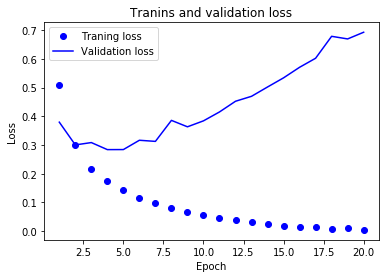

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['loss'])+1)

plt.plot(epochs, loss_values, 'bo', label='Traning loss') # bo=藍色的圓點
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b=藍色實線
plt.title('Tranins and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() # 標線名稱
plt.show()

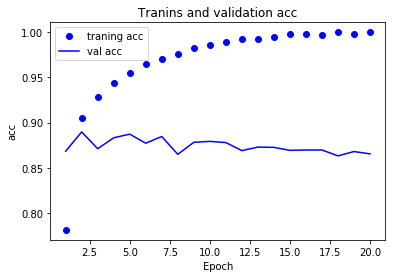

In [23]:
plt.clf() #清空圖

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='val acc')
plt.title('Tranins and validation acc')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend() # 標線名稱
plt.show()

# over fit

In [24]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, batch_size=512, 
                    epochs=4)

results = model.evaluate(x_test,y_test)
results

Epoch 1/4
15000/15000 [==============================] - 1s 88us/step - loss: 0.5326 - acc: 0.7917
Epoch 2/4
15000/15000 [==============================] - 1s 70us/step - loss: 0.3258 - acc: 0.8987
Epoch 3/4
15000/15000 [==============================] - 1s 70us/step - loss: 0.2357 - acc: 0.9245
Epoch 4/4
25000/25000 [==============================] - 3s 113us/step


[0.3013491501235962, 0.8772]